<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB
(1309, 12)
(1309, 12)


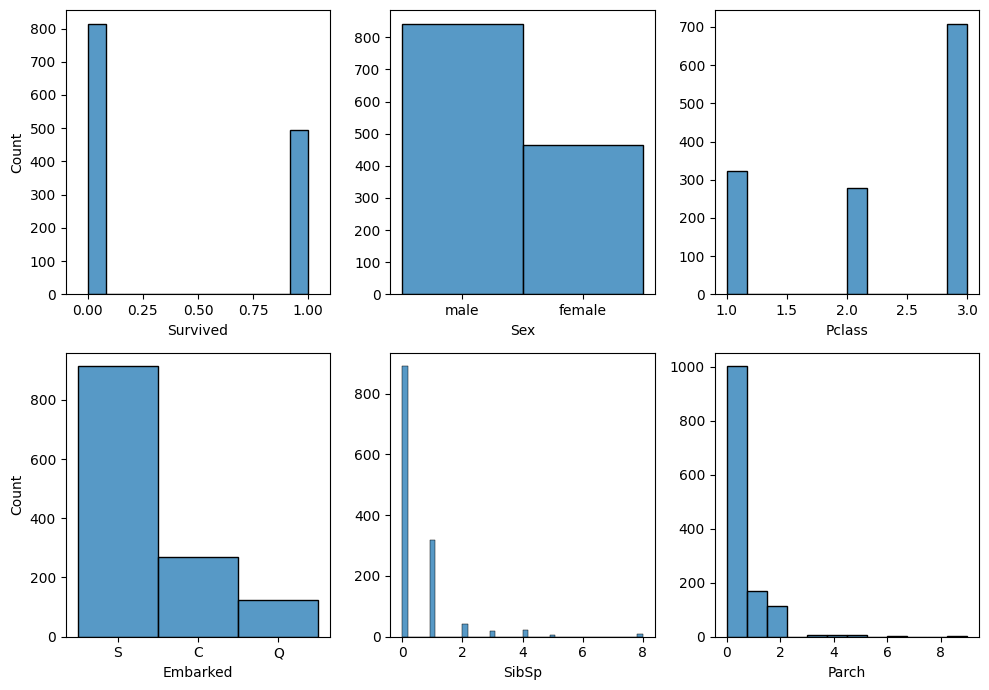

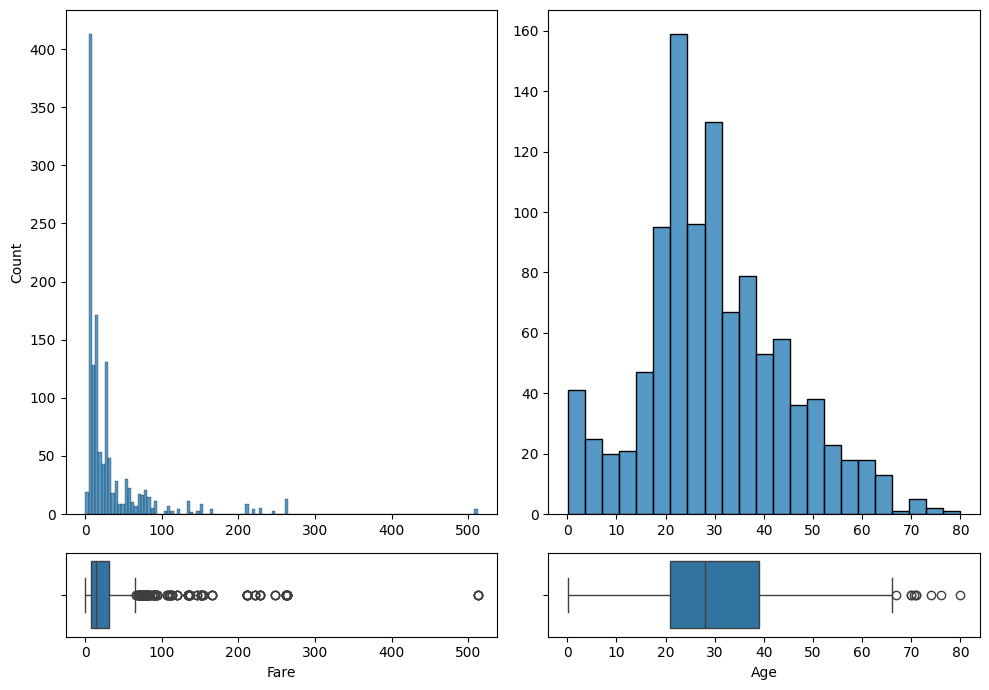

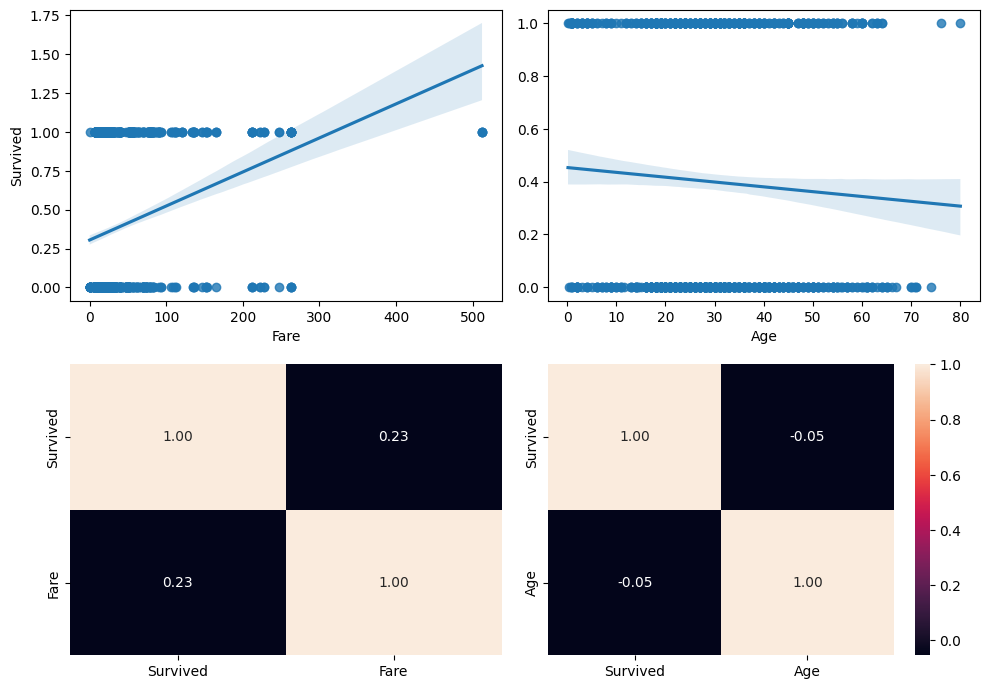

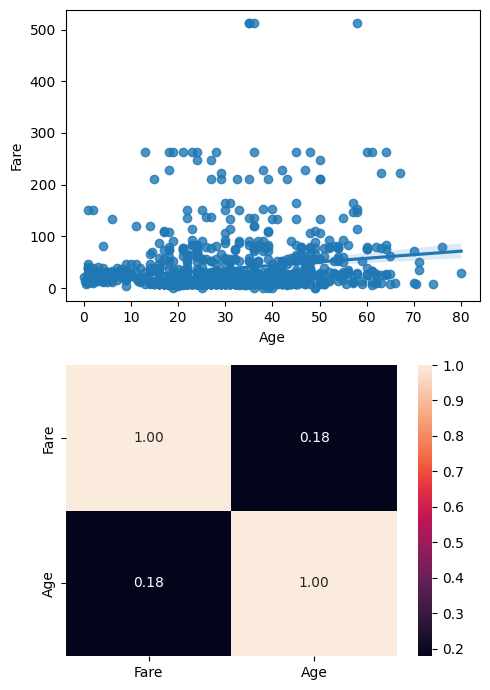

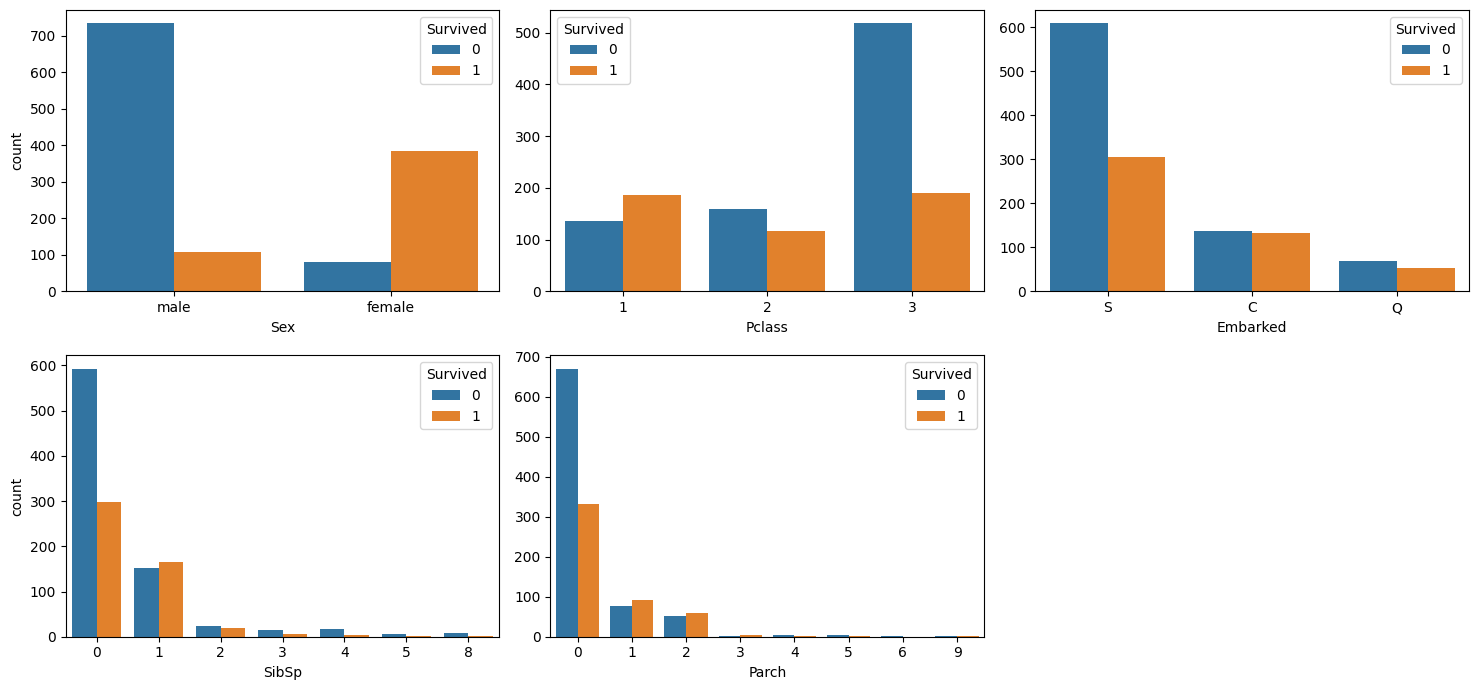

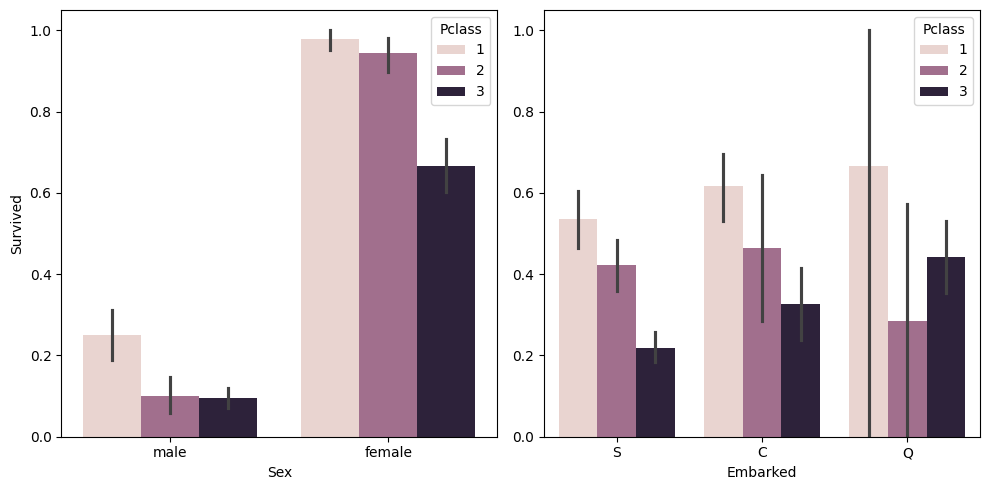

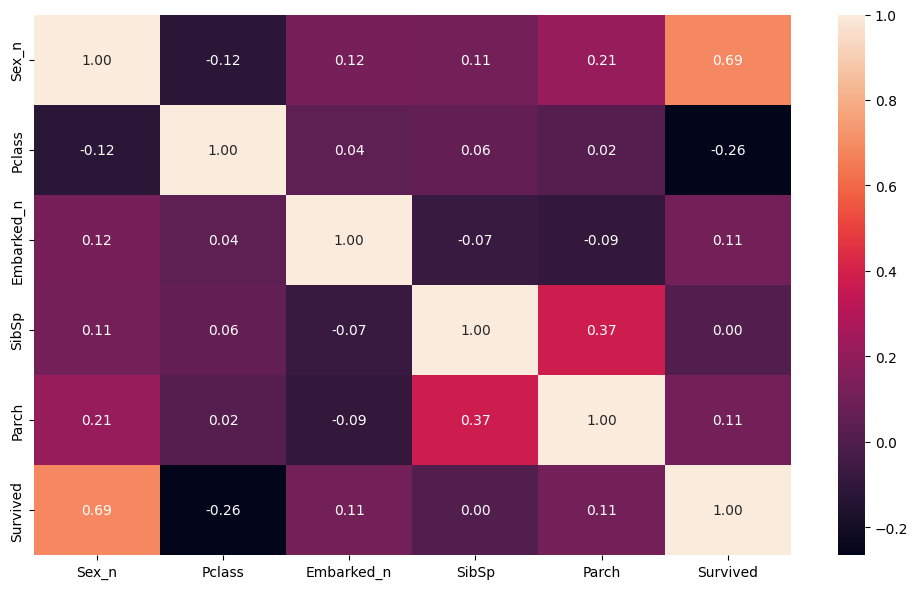

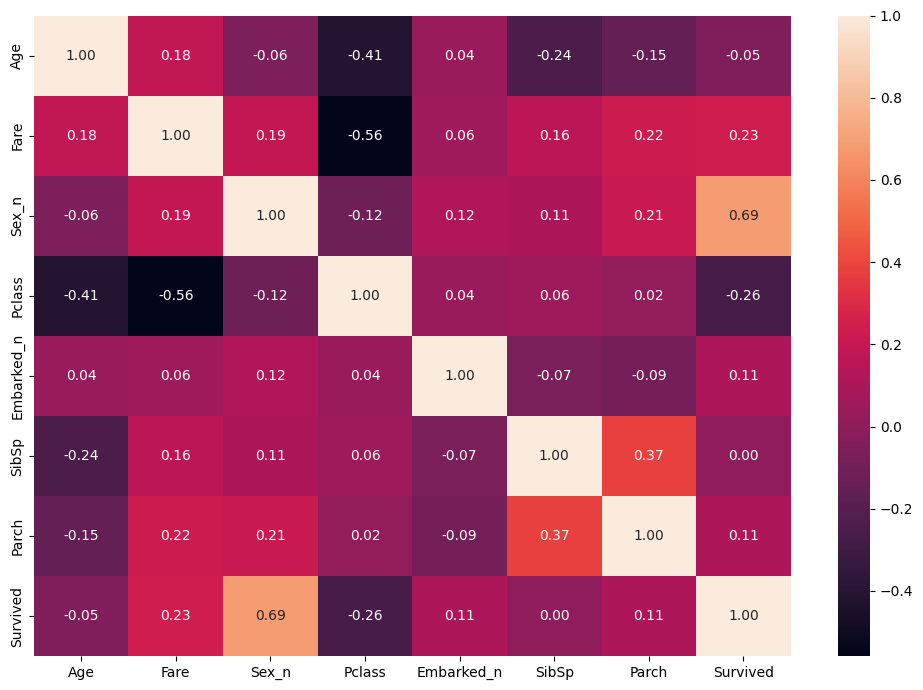

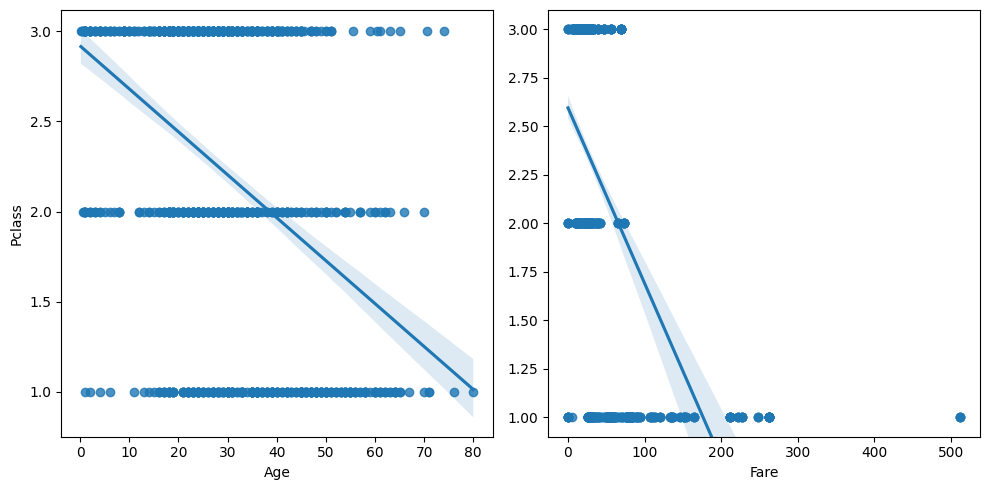

T-Statistic: nan
P-Value: nan
There is no statistically significant difference in fares between survivors and non-survivors.


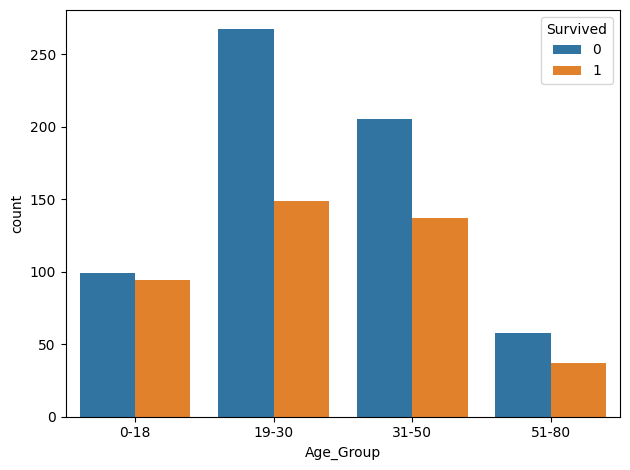

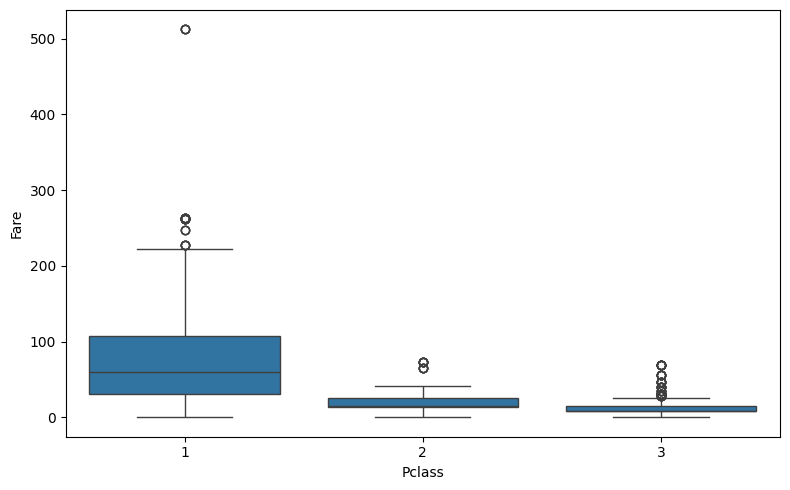

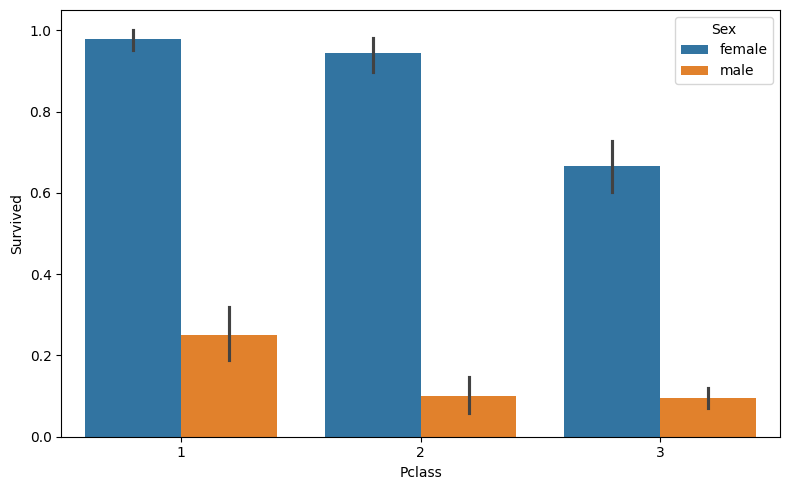

In [3]:
# -*- coding: utf-8 -*-
"""EDA_Day1_Titanic.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1z52EskkpDQwc_exsah9SL-NYKV-Ahhrc

"EDA 👉 Day 1 = Step 1: Problem Statement and Data Collection"
"""

import pandas as pd

# Read the training, testing, and survival data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_survived_data = pd.read_csv("gender_submission.csv")

# Add the "Survived" column to the test data
test_data["Survived"] = test_survived_data["Survived"]

# Concatenate the training and test data
total_data = pd.concat([train_data, test_data], ignore_index=True)

# Drop the "index" column (if it exists)
total_data.drop(columns=["index"], inplace=True, errors='ignore')

# Display the first few rows of the data
total_data.head()

# Show the shape (number of rows and columns) of the data
total_data.shape

# Display information about the data, such as column data types and missing values
total_data.info()

# Count duplicated rows (excluding the "PassengerId" column)
total_data.drop("PassengerId", axis=1).duplicated().sum()

# Remove duplicated rows (excluding the "PassengerId" column)
total_data = total_data.drop_duplicates(subset=total_data.columns.difference(['PassengerId']))
print(total_data.shape)

# Check and remove completely duplicated rows in the data
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)

# Drop unnecessary columns ("PassengerId", "Name", "Ticket", "Cabin")
total_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Import the Matplotlib and Seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 rows and 3 columns
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create histograms for the categorical variables "Survived," "Sex," "Pclass," "Embarked," "SibSp," "Parch,"
# and make some customizations
sns.histplot(ax=axis[0, 0], data=total_data, x="Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax=axis[0, 1], data=total_data, x="Sex").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=total_data, x="Pclass").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=total_data, x="Embarked")
sns.histplot(ax=axis[1, 1], data=total_data, x="SibSp").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=total_data, x="Parch").set(ylabel=None)

# Adjust the layout of the figure
plt.tight_layout()

# Show the plot
plt.show()

# Create a figure with 2 rows and 2 columns, with a custom height ratio
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Create histograms and box plots for "Fare" and "Age"
sns.histplot(ax=axis[0, 0], data=total_data, x="Fare").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=total_data, x="Fare")
sns.histplot(ax=axis[0, 1], data=total_data, x="Age").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=total_data, x="Age")

# Adjust the layout of the figure
plt.tight_layout()

# Show the plot
plt.show()

# Numerical vs. Numerical Analysis
# Survival vs. Fare, Age
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create scatter plots
sns.regplot(ax=axis[0, 0], data=total_data, x="Fare", y="Survived")
sns.heatmap(total_data[["Survived", "Fare"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=total_data, x="Age", y="Survived").set(ylabel=None)
sns.heatmap(total_data[["Survived", "Age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Adjust the layout of the figure
plt.tight_layout()

# Show the plot
plt.show()

# Fare vs. Age
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

# Create a scatter plot
sns.regplot(ax=axis[0], data=total_data, x="Age", y="Fare")
sns.heatmap(total_data[["Fare", "Age"]].corr(), annot=True, fmt=".2f", ax=axis[1])

# Adjust the layout of the figure
plt.tight_layout()

# Show the plot
plt.show()

# Categorical vs. Categorical Analysis
# Survival vs. (Sex, Pclass, Embarked, SibSp, Parch)
fig, axis = plt.subplots(2, 3, figsize=(15, 7))

sns.countplot(ax=axis[0, 0], data=total_data, x="Sex", hue="Survived")
sns.countplot(ax=axis[0, 1], data=total_data, x="Pclass", hue="Survived").set(ylabel=None)
sns.countplot(ax=axis[0, 2], data=total_data, x="Embarked", hue="Survived").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=total_data, x="SibSp", hue="Survived")
sns.countplot(ax=axis[1, 1], data=total_data, x="Parch", hue="Survived").set(ylabel=None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

# Show the plot
plt.show()

# Combinations of Class with Various Predictors
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.barplot(ax=axis[0], data=total_data, x="Sex", y="Survived", hue="Pclass")
sns.barplot(ax=axis[1], data=total_data, x="Embarked", y="Survived", hue="Pclass").set(ylabel=None)

plt.tight_layout()

# Show the plot
plt.show()

# Correlation Analysis
total_data["Sex_n"] = pd.factorize(total_data["Sex"])[0]
total_data["Embarked_n"] = pd.factorize(total_data["Embarked"])[0]

fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(total_data[["Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

# Show the plot
plt.show()

# Numerical vs. Categorical Analysis (Complete)
fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(total_data[["Age", "Fare", "Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

# Show the plot
plt.show()

fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.regplot(ax=axis[0], data=total_data, x="Age", y="Pclass")
sns.regplot(ax=axis[1], data=total_data, x="Fare", y="Pclass").set(ylabel=None, ylim=(0.9, 3.1))

plt.tight_layout()

# Show the plot
plt.show()

# Statistical Analysis
from scipy.stats import ttest_ind

# Perform a t-test to compare the "Fare" between passengers who survived and those who didn't
survived_fare = total_data[total_data["Survived"] == 1]["Fare"]
not_survived_fare = total_data[total_data["Survived"] == 0]["Fare"]
t_statistic, p_value = ttest_ind(survived_fare, not_survived_fare, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Conclusion based on p-value
if p_value < 0.05:
    print("There is a statistically significant difference in fares between survivors and non-survivors.")
else:
    print("There is no statistically significant difference in fares between survivors and non-survivors.")

# Survival vs. Age Group
total_data['Age_Group'] = pd.cut(total_data['Age'], bins=[0, 18, 30, 50, 80], labels=['0-18', '19-30', '31-50', '51-80'])

# Create a countplot for survival vs. age group
sns.countplot(data=total_data, x='Age_Group', hue='Survived')

plt.tight_layout()

# Show the plot
plt.show()

# Fare Distribution by Class
fig, axis = plt.subplots(figsize=(8, 5))

# Create a box plot to visualize the fare distribution by class
sns.boxplot(data=total_data, x='Pclass', y='Fare')

plt.tight_layout()

# Show the plot
plt.show()

# Survival Rate by Class and Gender
fig, axis = plt.subplots(figsize=(8, 5))

# Create a bar plot to show the survival rate by class and gender
sns.barplot(data=total_data, x='Pclass', y='Survived', hue='Sex')

plt.tight_layout()

# Show the plot
plt.show()


